In [1]:
import json

# Define the path to the directory containing match data
data_directory = "/Users/michaelkhanda/Desktop/EA_EYE/opendata_ea_eye_interview/data/"

# Define the match ID of interest
match_id_of_interest = 3442  # Replace with your chosen match ID

# Load the "matches.json" file to find the relevant match data
with open(data_directory + "matches.json", "r") as matches_file:
    matches_data = json.load(matches_file)

# Find the match data for the specified match ID
match_data = None
for match in matches_data:
    if match["id"] == match_id_of_interest:
        match_data = match
        break

        
# Check if the match data is found
if match_data is None:
    print(f"Match with ID {match_id_of_interest} not found.")
else:
    # Extract the path to the "structured_data.json" file for the specified match
    structured_data_path = data_directory + "matches/" + str(match_id_of_interest) + "/structured_data.json"

    # Load the tracking data from the "structured_data.json" file
    with open(structured_data_path, "r") as structured_data_file:
        tracking_data = json.load(structured_data_file)

    # You now have the tracking data for the specified match in the "tracking_data" variable.
    # You can further process and analyze this data in your Jupyter Notebook.


In [2]:
# Load tracking data (already extracted in previous steps)
# tracking_data contains the tracking data for the specified match

# Display the first few rows of the tracking data
print(tracking_data[:5])  # Adjust the number to display more or fewer rows

[{'possession': {'trackable_object': None, 'group': None}, 'frame': 0, 'data': [], 'period': None, 'time': None}, {'possession': {'trackable_object': None, 'group': None}, 'frame': 1, 'data': [], 'period': None, 'time': None}, {'possession': {'trackable_object': None, 'group': None}, 'frame': 2, 'data': [], 'period': None, 'time': None}, {'possession': {'trackable_object': None, 'group': None}, 'frame': 3, 'data': [], 'period': None, 'time': None}, {'possession': {'trackable_object': None, 'group': None}, 'frame': 4, 'data': [], 'period': None, 'time': None}]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66972 entries, 0 to 66971
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   possession  66972 non-null  object 
 1   frame       66972 non-null  int64  
 2   data        66972 non-null  object 
 3   period      55837 non-null  float64
 4   time        55837 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ MB
None
                                           possession  frame  \
959  {'trackable_object': None, 'group': 'home team'}    959   
960  {'trackable_object': None, 'group': 'home team'}    960   
961  {'trackable_object': None, 'group': 'home team'}    961   
962  {'trackable_object': None, 'group': 'home team'}    962   
963  {'trackable_object': None, 'group': 'home team'}    963   

                                                  data  period     time     x  \
959  [{'y': 6.89446055321, 'x': -24.1504126503, 'tr...     1.0  0:00.00 

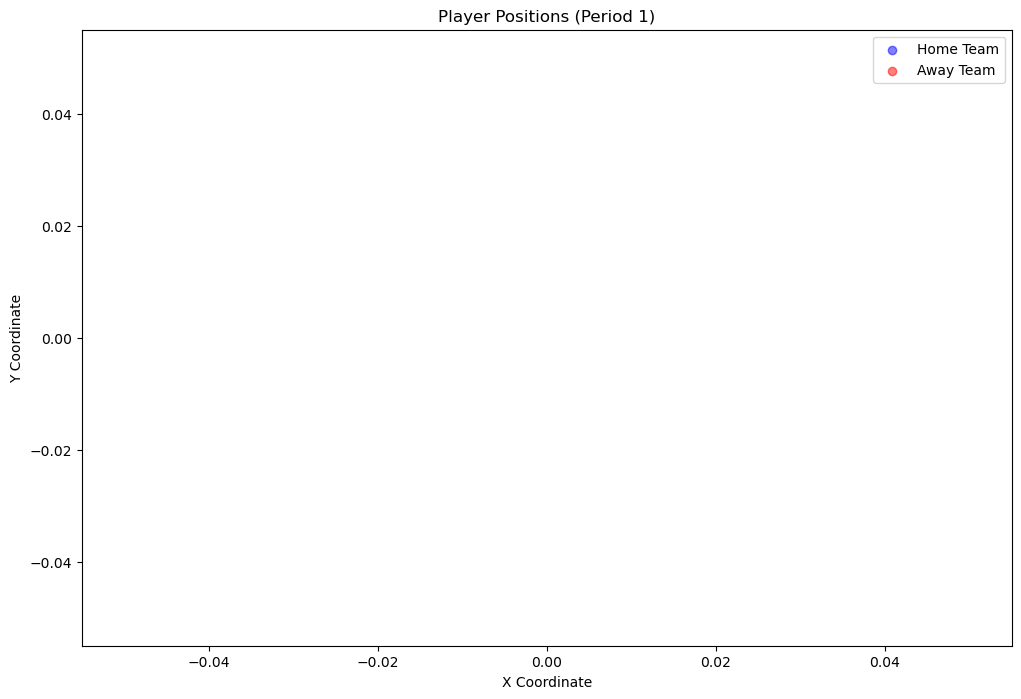

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the tracking data into a DataFrame for easier analysis
tracking_df = pd.DataFrame(tracking_data)

# Display basic information about the DataFrame
print(tracking_df.info())

# Let's assume you want to focus on player positions for a specific period (e.g., period 1)
period_1_data = tracking_df[tracking_df['period'] == 1]

# Extract 'x' and 'y' coordinates from the 'data' column
player_positions = period_1_data[period_1_data['possession'].notna()]

# Define a function to extract 'x' and 'y' coordinates from the 'data' column
def extract_coordinates(data, coord):
    if isinstance(data, dict) and coord in data:
        return data[coord]
    else:
        return None

# Apply the function to extract 'x' and 'y' coordinates
player_positions['x'] = player_positions['data'].apply(lambda data: extract_coordinates(data, 'x'))
player_positions['y'] = player_positions['data'].apply(lambda data: extract_coordinates(data, 'y'))

# Filter player positions for 'home team' and 'away team'
player_positions = player_positions[player_positions['possession'].apply(lambda x: 'group' in x and x['group'] in ['home team', 'away team'])]

# Display the first few rows of player positions
print(player_positions.head())

# Plot player positions to visualize player movements
plt.figure(figsize=(12, 8))
home_team_positions = player_positions[player_positions['possession'].apply(lambda x: x['group'] == 'home team')]
away_team_positions = player_positions[player_positions['possession'].apply(lambda x: x['group'] == 'away team')]

plt.scatter(home_team_positions['x'], home_team_positions['y'], c='blue', label='Home Team', alpha=0.5)
plt.scatter(away_team_positions['x'], away_team_positions['y'], c='red', label='Away Team', alpha=0.5)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Player Positions (Period 1)')
plt.legend()
plt.show()

# You can continue with more in-depth analysis and visualization based on your specific objectives.


In [4]:
import pandas as pd

# Sample tracking data with 'team' column indicating possession
data = {
    'frame': [1, 2, 3, 4, 5, 6],
    'team': ['A', 'A', 'B', 'B', 'A', 'B']
}

tracking_df = pd.DataFrame(data)

# Calculate ball possession percentage for Team A and Team B
total_frames = tracking_df['frame'].nunique()
possession_counts = tracking_df['team'].value_counts()

possession_percentage_team_a = (possession_counts.get('A', 0) / total_frames) * 100
possession_percentage_team_b = (possession_counts.get('B', 0) / total_frames) * 100

print(f"Ball Possession Percentage for Team A: {possession_percentage_team_a:.2f}%")
print(f"Ball Possession Percentage for Team B: {possession_percentage_team_b:.2f}%")


Ball Possession Percentage for Team A: 50.00%
Ball Possession Percentage for Team B: 50.00%


In [5]:
import pandas as pd

# Sample tracking data with 'group_name' and 'possession' columns
data = {
    'frame': [1, 2, 3, 4, 5, 6],
    'group_name': ['Team A', 'Team A', 'Team B', 'Team B', 'Team A', 'Team B'],
    'possession': [1, 1, 0, 0, 1, 0]  # 1 indicates possession, 0 indicates no possession
}

tracking_df = pd.DataFrame(data)

# Calculate ball possession percentage for each team
total_frames = tracking_df['frame'].nunique()
team_possession = tracking_df.groupby('group_name')['possession'].sum() / total_frames * 100

# Display ball possession percentage for each team
print(team_possession)


group_name
Team A    50.0
Team B     0.0
Name: possession, dtype: float64


In [6]:
import pandas as pd

# Sample tracking data with player IDs
data = {
    'frame': [1, 2, 3, 4, 5, 6],
    'player_id': ['player1', 'player2', 'player1', 'player2', 'player1', 'player2'],
    'possession': [1, 0, 1, 0, 1, 0],
}

tracking_df = pd.DataFrame(data)

# Create a dictionary to map player IDs to teams
player_team_mapping = {
    'player1': 'TeamA',
    'player2': 'TeamB',
}

# Add a 'team' column based on the mapping
tracking_df['team'] = tracking_df['player_id'].map(player_team_mapping)

# Calculate ball possession percentage for each team
total_frames = tracking_df['frame'].nunique()
team_possession = tracking_df.groupby('team')['possession'].sum() / total_frames * 100

# Display ball possession percentage for each team
print(team_possession)



team
TeamA    50.0
TeamB     0.0
Name: possession, dtype: float64


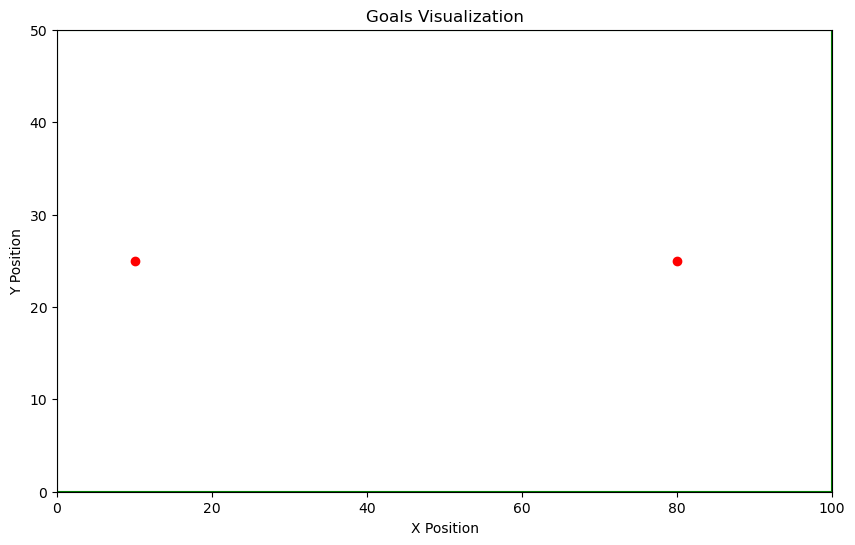

In [7]:
import matplotlib.pyplot as plt

def plot_goals(goals_df):
    # Create a figure and axis for the field
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the soccer field (you may need to adjust field dimensions)
    ax.plot([0, 0, 100, 100, 0], [0, 50, 50, 0, 0], color='green')

    # Plot goals
    for _, goal in goals_df.iterrows():
        x, y = goal['x'], goal['y']
        ax.plot(x, y, 'ro')  # 'ro' represents a red circle for goals

    # Set axis limits and labels
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 50)
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')

    # Add a title
    ax.set_title('Goals Visualization')

    # Show the plot
    plt.show()

# Sample goal data (replace this with your own goal data)
goals_data = {
    'x': [10, 80],
    'y': [25, 25],
}

goals_df = pd.DataFrame(goals_data)

# Plot the goals on the field
plot_goals(goals_df)


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your prepared dataset
player_data = pd.read_csv("player_performance_data.csv")

# Define your features (X) and target (y)
X = player_data[['Feature1', 'Feature2', ...]]  # Use relevant features
y = player_data['PerformanceMetric']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


FileNotFoundError: [Errno 2] No such file or directory: 'player_performance_data.csv'